# LET'S work on the housing dataset !

In [74]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [75]:
df=pd.read_csv(r'C:\Users\Aditya\Downloads\housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [77]:
df.shape 

(20640, 10)

In [78]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There are 207 null values present in the column named "total_bedrooms"

In [79]:
df.total_bedrooms.mean()

537.8705525375618

In [80]:
df.dropna(inplace=True)

In [81]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

No null values present

In [82]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Lets do the nominal label encoding for better understanding!

In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
le=LabelEncoder()
le.fit(df.ocean_proximity)

LabelEncoder()

In [85]:
df['ocean_proximity']=le.transform(df.ocean_proximity)

In [86]:
df['ocean_proximity'].unique()

array([3, 0, 1, 4, 2])

[3, 0, 1, 4, 2] = ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

In [87]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


OUTLIER DETECTION

In [88]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,1.166153
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,1.420135
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,1.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


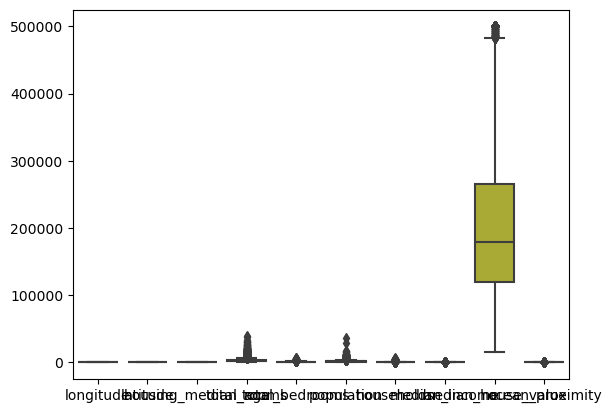

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [89]:
sns.boxplot(data=df)
plt.show()
plt.figure(figsize=(15,5))

So much outliers are present in the dataset, which will cause in accuracy reduction

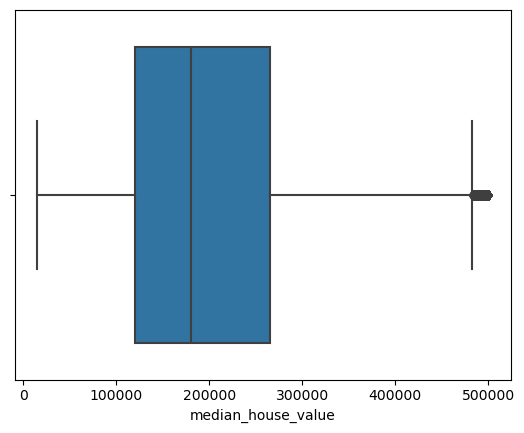

In [90]:
sns.boxplot(x='median_house_value',data=df)
plt.show()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_12360\945318759.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['median_house_value'], color='red',kde=True, bins=5)
C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


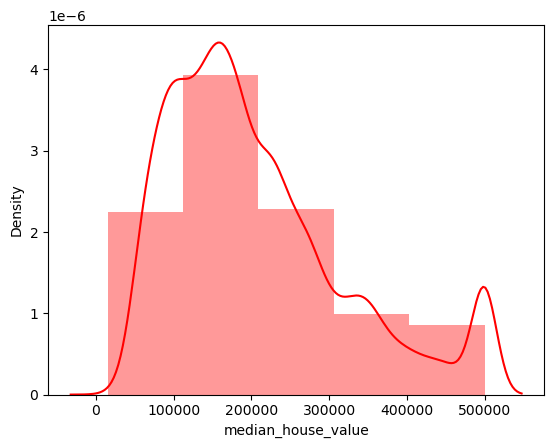

In [91]:
sns.distplot(df['median_house_value'], color='red',kde=True, bins=5)
plt.show()

We can see the tail is so long , so the outliers are present

OUTLIERS REMOVAL

In [92]:
df.shape

(20433, 10)

In [93]:
q1=df.median_house_value.quantile(0.25)                         #gives the 25% value from the dataset
q3=df.median_house_value.quantile(0.75)                         #gives the 75% value from the dataset

In [94]:
q1,q3

(119500.0, 264700.0)

In [95]:
IQR=q3-q1          #INTER-QUANTILE-RANGE

In [96]:
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
min_range,max_range
             

(-98300.0, 482500.0)

In [97]:
df=df[df['median_house_value']<=max_range]   #outliers removed efficiently

In [98]:
df.shape

(19369, 10)

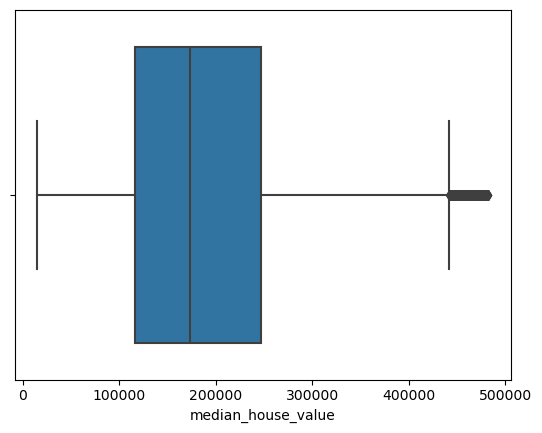

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [99]:
sns.boxplot(x='median_house_value',data=df)
plt.show()
plt.figure(figsize=(15,5))

C:\Users\Aditya\AppData\Local\Temp\ipykernel_12360\945318759.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['median_house_value'], color='red',kde=True, bins=5)
C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


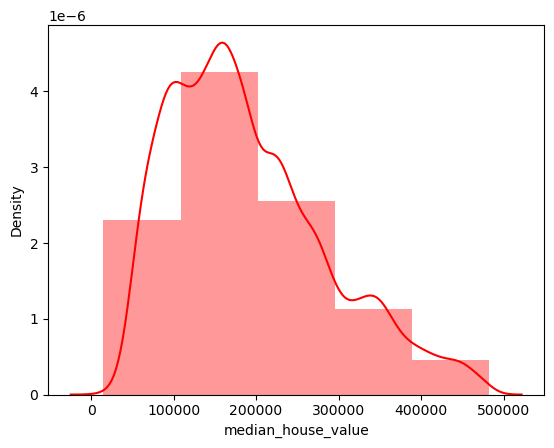

In [100]:
sns.distplot(df['median_house_value'], color='red',kde=True, bins=5)
plt.show()

In [101]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Training & Testing data

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [104]:
x_train , x_test , y_train , y_test = train_test_split(x,y, random_state=42 , test_size=0.2)

In [105]:
train_data = x_train.join(y_train)

In [106]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9898,-122.28,38.30,23.0,526.0,152.0,245.0,130.0,2.0134,3,142500.0
11939,-117.42,33.93,32.0,2885.0,595.0,1509.0,590.0,3.1795,1,125600.0
3931,-118.59,34.21,26.0,2335.0,669.0,1986.0,645.0,2.9974,0,178800.0
19481,-120.97,37.66,21.0,2760.0,632.0,1260.0,576.0,2.0227,1,179800.0
4302,-118.29,34.09,52.0,1272.0,322.0,984.0,353.0,1.9063,0,261600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

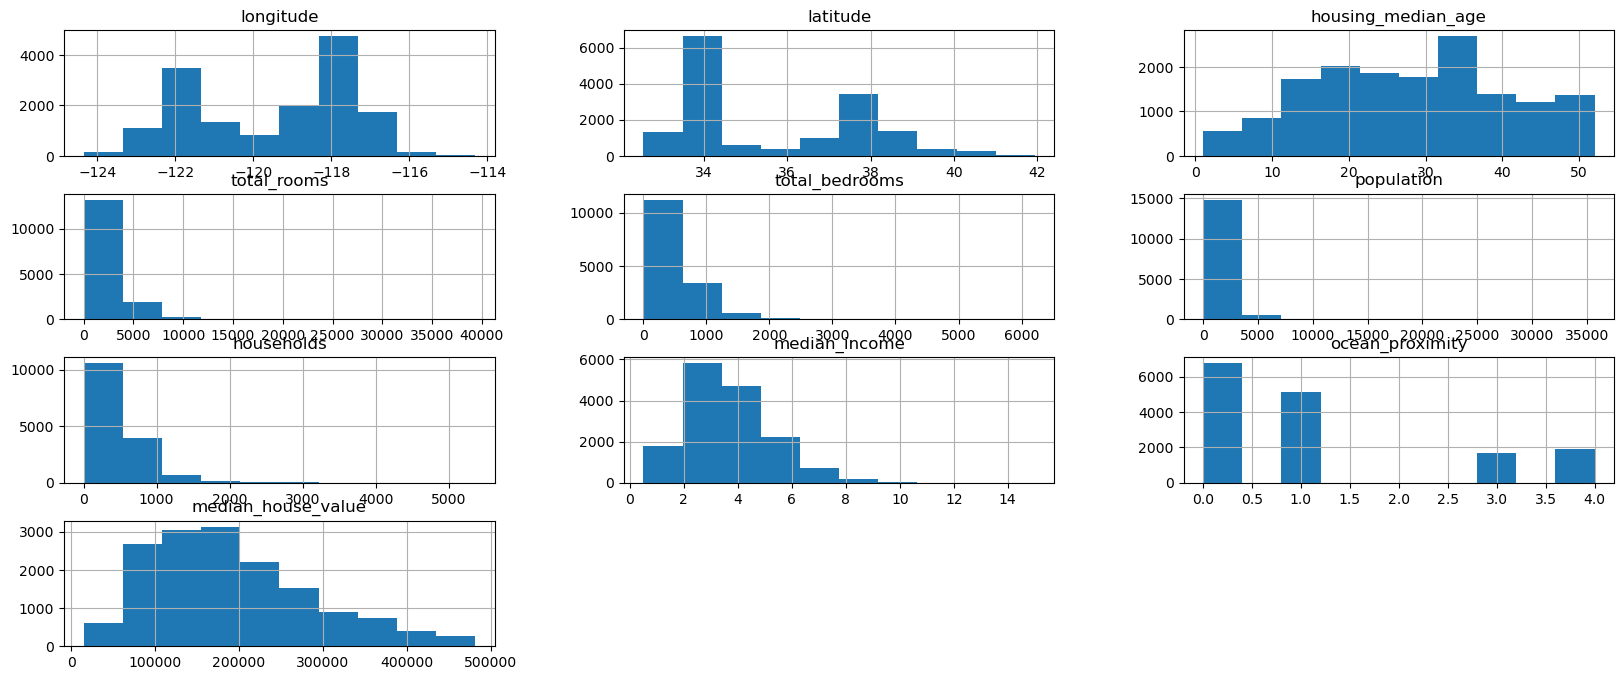

In [107]:
train_data.hist(figsize=(20,8))

In [108]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.923790,-0.099270,0.048671,0.075925,0.106607,0.062180,-0.010917,-0.287844,-0.044027
latitude,-0.923790,1.000000,0.004556,-0.035753,-0.071687,-0.117265,-0.076763,-0.075957,0.200396,-0.151867
housing_median_age,-0.099270,0.004556,1.000000,-0.376042,-0.333598,-0.301105,-0.316986,-0.201079,0.106466,0.057291
total_rooms,0.048671,-0.035753,-0.376042,1.000000,0.936104,0.857580,0.923215,0.225876,-0.014160,0.146046
total_bedrooms,0.075925,-0.071687,-0.333598,0.936104,1.000000,0.877160,0.978237,0.025646,-0.011819,0.077648
population,0.106607,-0.117265,-0.301105,0.857580,0.877160,1.000000,0.908268,0.047815,-0.065423,0.018029
households,0.062180,-0.076763,-0.316986,0.923215,0.978237,0.908268,1.000000,0.051120,-0.015389,0.098124
median_income,-0.010917,-0.075957,-0.201079,0.225876,0.025646,0.047815,0.051120,1.000000,-0.046629,0.645874
ocean_proximity,-0.287844,0.200396,0.106466,-0.014160,-0.011819,-0.065423,-0.015389,-0.046629,1.000000,0.062269
median_house_value,-0.044027,-0.151867,0.057291,0.146046,0.077648,0.018029,0.098124,0.645874,0.062269,1.000000


<Axes: >

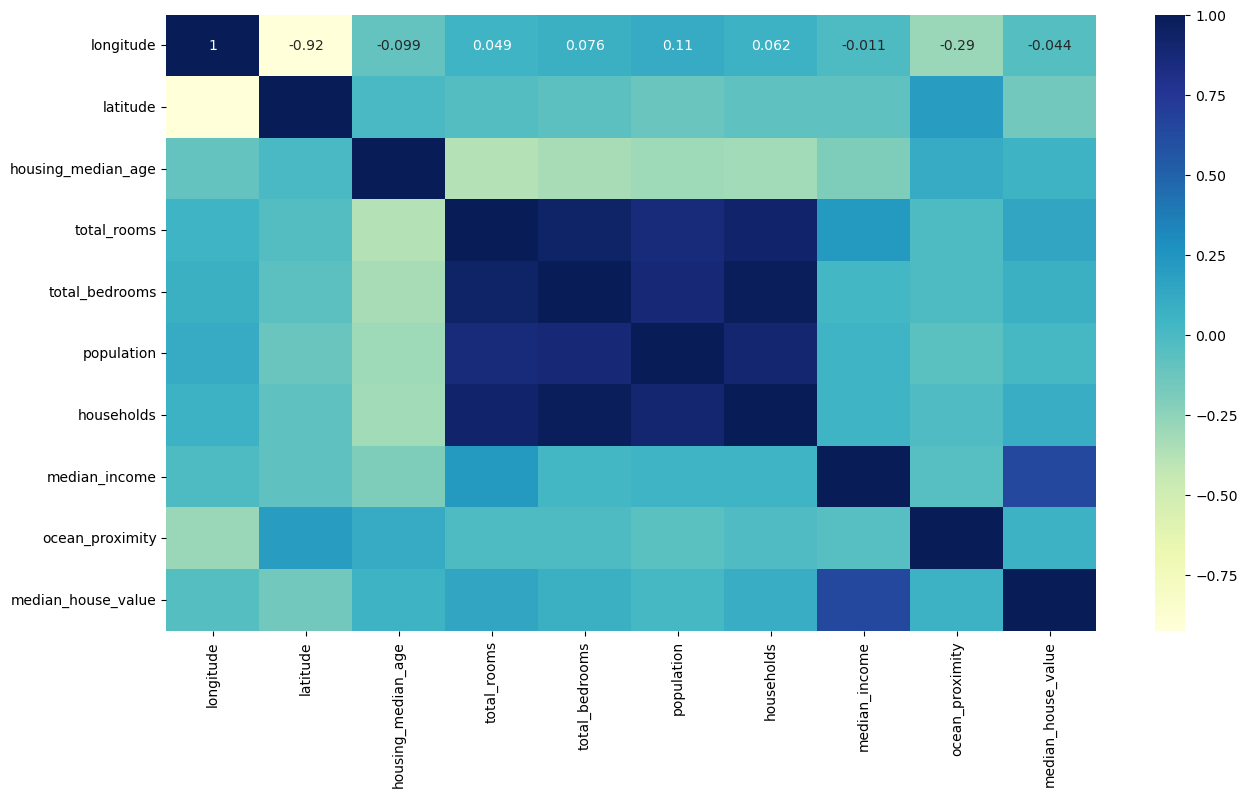

In [109]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True , cmap='YlGnBu')

In [110]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.923983,-0.102982,0.045519,0.070550,0.102073,0.057417,-0.010923,-0.046874,-0.278905
latitude,-0.923983,1.000000,0.006967,-0.034247,-0.068627,-0.114527,-0.074176,-0.076198,-0.149456,0.192769
housing_median_age,-0.102982,0.006967,1.000000,-0.371982,-0.328113,-0.294317,-0.310047,-0.197132,0.062070,0.107816
total_rooms,0.045519,-0.034247,-0.371982,1.000000,0.934352,0.859769,0.921801,0.226240,0.146601,-0.016315
total_bedrooms,0.070550,-0.068627,-0.328113,0.934352,1.000000,0.879267,0.979089,0.024747,0.078678,-0.012889
population,0.102073,-0.114527,-0.294317,0.859769,0.879267,1.000000,0.909164,0.045606,0.016981,-0.068135
households,0.057417,-0.074176,-0.310047,0.921801,0.979089,0.909164,1.000000,0.049453,0.098364,-0.016503
median_income,-0.010923,-0.076198,-0.197132,0.226240,0.024747,0.045606,0.049453,1.000000,0.644410,-0.046469
median_house_value,-0.046874,-0.149456,0.062070,0.146601,0.078678,0.016981,0.098364,0.644410,1.000000,0.059012
ocean_proximity,-0.278905,0.192769,0.107816,-0.016315,-0.012889,-0.068135,-0.016503,-0.046469,0.059012,1.000000


<Axes: >

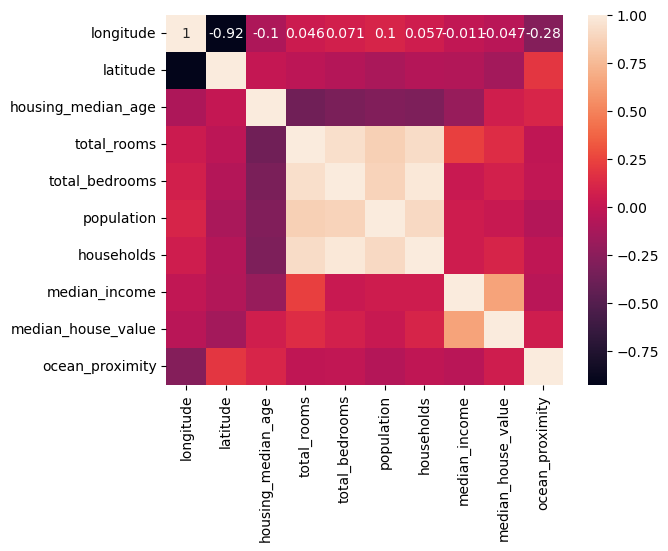

In [111]:
sns.heatmap(df.corr(), annot=True)

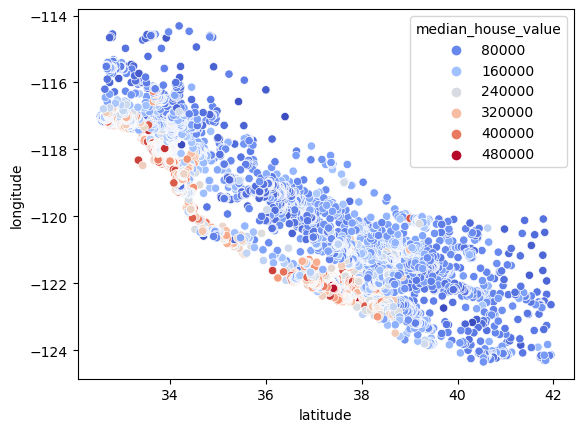

In [112]:
sns.scatterplot(x='latitude',y='longitude', data=df, hue='median_house_value',palette='coolwarm')
plt.show()

LINEAR REGRESSION

In [113]:
from sklearn.linear_model import LinearRegression, Lasso , Ridge

In [114]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [115]:
lr.score(x_train , y_train)*100 , lr.score(x_test, y_test)*100         #very low accuracy

(60.29607424332022, 60.0504026369111)

In [116]:
la=Lasso(alpha=10)
la.fit(x_train , y_train)

Lasso(alpha=10)

In [117]:
la.score(x_train , y_train)*100 , la.score(x_test, y_test)*100 

(60.29606459258792, 60.04896707611207)

In [118]:
ri=Ridge(alpha=10)
ri.fit(x_train , y_train)

Ridge(alpha=10)

In [119]:
ri.score(x_train , y_train)*100 , ri.score(x_test, y_test)*100 

(60.29602465594357, 60.04791444515214)

LOGISTIC REGRESSION

In [120]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

In [121]:
x=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [122]:
x_train , x_test , y_train , y_test = train_test_split(x,y, random_state=42 , test_size=0.2)

In [123]:
lr=LogisticRegression() 
lr.fit(x_train, y_train)

C:\Users\Aditya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
lr.score(x_train,y_train)*10000 , lr.score(x_test,y_test)*10000

(77.44433688286544, 43.88229220443986)

In [125]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB ,MultinomialNB

In [126]:
gnb= GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [127]:
gnb.score(x_train , y_train )*1000 , gnb.score(x_test, y_test)*10000

(96.61181026137464, 15.487867836861124)

In [128]:
bnb=BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [129]:
bnb.score(x_test, y_test)*10000 ,  bnb.score(x_train, y_train)*10000

(59.37016004130098, 68.40916424653113)

ENSEMBLE METHODS

In [130]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [131]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100 , lr.score(x_test,y_test)*100

(60.29607424332022, 60.0504026369111)

In [132]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100 , dt.score(x_test,y_test)*100

(100.0, 60.82358283836713)

In [133]:
sv=SVR()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100 , sv.score(x_test,y_test)*100

(-3.1646972551621078, -3.278640690621981)

In [134]:
li1 = [('lr1',LinearRegression()), ('dt1',DecisionTreeRegressor()),('sv1',SVR())]

In [135]:
from sklearn.ensemble import VotingRegressor

In [136]:
vc=VotingRegressor(li1) 
vc.fit(x_train,y_train)

VotingRegressor(estimators=[('lr1', LinearRegression()),
                            ('dt1', DecisionTreeRegressor()), ('sv1', SVR())])

In [137]:
vc.score(x_train,y_train)*100 , vc.score(x_test,y_test)*100

(75.30451422568105, 61.998554997269785)

BAGGING

In [138]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [139]:
bg=BaggingRegressor(estimator=DecisionTreeRegressor(),n_estimators=45)
bg.fit(x_train , y_train)
bg.score(x_train ,y_train)*100 , bg.score(x_test,y_test)*100

(96.86593712330745, 80.46333390910989)

In [140]:
rf=RandomForestRegressor(n_estimators=75,max_depth=150)
rf.fit(x_train,y_train)
rf.score(x_train ,y_train)*100 , rf.score(x_test,y_test)*100

(97.02022591384672, 80.54359293949562)

BEST ACCURACY CALCULATED OVERALL WITH ENSEMBLE METHOD

In [141]:
rf.predict(x_test) 

array([235084.        ,  68000.        , 156110.66666667, ...,
       145548.        ,  92854.66666667, 169870.66666667])

In [142]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


HYPERPARAMETER TUNING

In [143]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [144]:
dt =  {"criterion":["squared_error","friedman_mse","absolute_error","poisson"] , 
    "splitter":["best", "random"],
    "max_depth":[i for i in range (0,300)]} 

In [145]:
rd= RandomizedSearchCV(DecisionTreeRegressor(),param_distributions=dt,n_iter=20 )
rd.fit(x_train , y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=20,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, ...],
                                        'splitter': ['best', 'random']})

In [146]:
rd.best_params_

{'splitter': 'best', 'max_depth': 10, 'criterion': 'poisson'}

In [147]:
rd.best_score_*100

67.65562571214191

In [148]:
dt=DecisionTreeRegressor(splitter= 'best', max_depth= 7, criterion= 'absolute_error')
dt.fit(x_train , y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7)

In [149]:
dt.score(x_train ,y_train)*100, dt.score(x_test, y_test)*100

(69.13941833055026, 66.43487003995543)